需要import的lib都放在這~

In [6]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [69]:
"""Helper of data_mining from TA
Helper functions for data mining lab session 2018 Fall Semester
Author: Elvis Saravia
Email: ellfae@gmail.com
"""

def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

def check_missing_values(col):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in col:
        if element == True:
            counter+=1
    return ("The amount of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        """split a text to sentences"""
        for word in nltk.word_tokenize(d, language='english'):
            "split sentence to words"
            # filters here
            tokens.append(word)
    return tokens

In [3]:
""" Prepare dataset
    這個dataset是從3個網站中取得評論以及分數,分數有0跟1兩種
"""
website = ['amazon_cells', 'imdb', 'yelp']

準備我們要使用的dataset

In [63]:
"""Transfer data to a pandas Dataframe"""
import pandas as pd

now_dir = os.getcwd()
print("now_dir:{}".format(now_dir))
comments = []
webs = []
scores = []
for web in website:
    fileName = now_dir + "/../dataset/sentiment labelled sentences/"
    fileName += web + "_labelled.txt"
    print(fileName)
    with open(fileName,encoding="utf-8") as f:
        for line in f.readlines():
            """用這一行可以將input的字串用指定的子字串分割"""
            # print(line.split(" "))
            """先使用這個分割,就可以在print之後看到諸如\t, \n這樣的字元出現"""
            """如此一來我們就可以知道我們實際上該用甚麼子字串來分割"""

            """用\t就可以將文字分成評論跟分數兩個"""
            seperate_str = line.split("\t")
            comment = seperate_str[0]
            score = seperate_str[1].strip('\n')
            comments.append(comment)
            scores.append(score)
            webs.append(web)

            """line.split(".") 用.將line分割開來"""
            """ "".join() 將上一行分割後輸出的list合併成一個新的string, 使用"" 作為合併時插入的間隔"""
            """ .strip() 再將上一行輸出的string將arg中輸入的字元,從input的頭或尾去除"""
            # print("".join(line.split(".")).strip('\n'))

            """切割好資料了,現在將他們放進一個dataFrame當中"""

        print("---" * 10)
data = pd.DataFrame(list(zip(webs, comments,scores)),columns =['Web', 'Comment','Score'])


now_dir:d:\學校資料\111上學期\資料探勘與應用\python_env\data_mining\src
d:\學校資料\111上學期\資料探勘與應用\python_env\data_mining\src/../dataset/sentiment labelled sentences/amazon_cells_labelled.txt
------------------------------
d:\學校資料\111上學期\資料探勘與應用\python_env\data_mining\src/../dataset/sentiment labelled sentences/imdb_labelled.txt
------------------------------
d:\學校資料\111上學期\資料探勘與應用\python_env\data_mining\src/../dataset/sentiment labelled sentences/yelp_labelled.txt
------------------------------


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise2!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Experiment with other querying techniques using pandas dataframes. 
        Refer to their documentation for more information.

In [64]:
print("Show data by loc:")
print(data.loc[0])
print("---"*10)
print("Show data by using a range indexing")
print(data[0:1])
print("---"*10)
print("Checking if we get identity data by two different ways")
check = (data.loc[0] == data[0:1])
print(check)


Show data by loc:
Web                                             amazon_cells
Comment    So there is no way for me to plug it in here i...
Score                                                      0
Name: 0, dtype: object
------------------------------
Show data by using a range indexing
            Web                                            Comment Score
0  amazon_cells  So there is no way for me to plug it in here i...     0
------------------------------
Checking if we get identity data by two different ways
    Web  Comment  Score
0  True     True   True


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise2!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                Done.
            Cell just above this doc is the ans of Exercise2.

In [66]:
"""提取特定的column、row"""
data[:10][["Score","Web"]]    
data[:10][["Web"]]

,Web
0,amazon_cells
1,amazon_cells
2,amazon_cells
3,amazon_cells
4,amazon_cells
5,amazon_cells
6,amazon_cells
7,amazon_cells
8,amazon_cells
9,amazon_cells


In [67]:
"""提取特定的category"""
# 找出符合條件的index
index_we_want = (data['Score'] == "1")
data[index_we_want]

,Web,Comment,Score
1,amazon_cells,"Good case, Excellent value.",1
2,amazon_cells,Great for the jawbone.,1
4,amazon_cells,The mic is great.,1
7,amazon_cells,If you are Razr owner...you must have this!,1
10,amazon_cells,And the sound quality is great.,1
...,...,...,...
2899,yelp,"Overall, a great experience.",1
2901,yelp,Their regular toasted bread was equally satisf...,1
2907,yelp,The chips and sals a here is amazing!!!!!!!!!!...,1
2909,yelp,This is my new fav Vegas buffet spot.,1


In [70]:
"""檢查表格當中有沒有不含有資料的"""
data.isnull()      # returning false means data exist correctly
# 把X.isnull的結果作為x輸入到 check_missing_value裡面
data.isnull().apply(lambda x: check_missing_values(x))
#-----------上述操作與下述的code等價------------------
# check_result = X.isnull()
# print(check_result)
# check_missing_values(check_result)

,Web,Comment,Score
0,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:
1,0,0,0


In [71]:
"""去除data中不合法的資料(某一個column存在null"""
dummy_series = pd.Series(["dummy_record", 1], index=["Comment", "Score"])
"""檢查dummy_series長怎麼樣"""
# print(dummy_series.to_frame())
# print("---"*10)
# print(dummy_series.to_frame().T)
"""把我們自己做出來的dummy series放到data當中"""
result_with_series = pd.concat([data, dummy_series.to_frame().T], ignore_index=True)
""" check if the records was commited into result """
data.isnull().apply(lambda x: check_missing_values(x))
# 我們新增的資料沒有category_name，所以理論上這次檢查, null應該要多一個
""" 刪除有null val的資料"""
data.dropna(inplace=True)
"""check result again"""
data.isnull().apply(lambda x: check_missing_values(x))

,Web,Comment,Score
0,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:
1,0,0,0


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise5!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            Please check the data and the process below.
            Describe what you observe and why it happened.

In [72]:
import numpy as np

NA_dict = [ 
            { 'id': 'A', 'missing_example': np.nan },
            { 'id': 'B'                    },
            { 'id': 'C', 'missing_example': 'NaN'  },
            { 'id': 'D', 'missing_example': 'None' },
            { 'id': 'E', 'missing_example':  None  },
            { 'id': 'F', 'missing_example': ''     }
        ]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

在上面那個cell的資料當中，理論上所有的missing_example都代表著無效的資料
也因此，我們的NA_df['missing_example'].isnull()理論上應該要return 6個true
但因為資料用了不同的方法去表示，有一些並沒有被isnull抓出來
因此才會有一些資料逃過了isnull的檢查，也就可能會產生bug

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise5!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                Done.
            Cell just above this doc is the ans of Exercise5.

In [85]:
"""檢查有沒有重複的資料"""
data.duplicated()
checkDuplicate = sum(data.duplicated())
# 把X.duplicated()的回傳值都加起來
# 若沒有重複會回傳false(0) 
# 所以如果sum不是0 代表有資料重複
if checkDuplicate:
    print("Duplicated data exist")

In [88]:
"""處理掉重複的資料"""
"""先自己新增做出重複的資料"""
dummy_duplicate_dict = [{
                            'Web': 'dummy web',
                            'Score': 1, 
                            'Comment': "dummy comment"
                        },
                        {
                            'Web': 'dummy web',
                            'Score': 1, 
                            'Comment': "dummy comment"
                        }]
dummy_data = pd.DataFrame(dummy_duplicate_dict)
"""把資料放進data當中"""
data = pd.concat([data,dummy_data],ignore_index=True);
"""在去除重複的資料前先看一下是不是真的有重複(實際上沒有做ㄉ必要啦)"""
sum(data.duplicated())
"""把重複的資料刪掉"""
data.drop_duplicates(keep=False, inplace=True) # 所有重複的資料都刪掉
# data.drop_duplicates(keep="first", inplace=True) # 重複的資料保留排序較前的那一筆
# data.drop_duplicates(keep="last", inplace=True) # 重複的資料保留排序較後的那一筆
"""檢查結果~"""
sum(data.duplicated())

0

In [76]:
"""接著是資料的採樣"""
data_sample1 = data.sample(n=1000)
data_sample2 = data.sample(n=1000)

In [89]:
data_sample1[0:4]
data_sample2[0:4]

,Web,Comment,Score
1589,imdb,"Beware: this is not a trashy cult movie, this ...",0
402,amazon_cells,Excellent product for the price.,1
1693,imdb,I advise you to look out for it.,1
2527,yelp,"Be sure to order dessert, even if you need to ...",1


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise6!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        Notice any changes to the X dataframe? What are they?

                            抱歉ㄌ，我不知道QAQ

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise6!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                Done.
            Cell just above this doc is the ans of Exercise6.

In [90]:
# 統計每個種類有多少數量
print(data.Web.value_counts())
print(data_sample1.Web.value_counts())
print(data_sample2.Web.value_counts())
data1_cnt = data_sample1.Web.value_counts()
data2_cnt = data_sample2.Web.value_counts()

imdb            997
yelp            996
amazon_cells    990
Name: Web, dtype: int64
imdb            348
yelp            340
amazon_cells    312
Name: Web, dtype: int64
yelp            348
imdb            333
amazon_cells    319
Name: Web, dtype: int64


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise8!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 Do a side-by-side comparison of the distribution between datasets

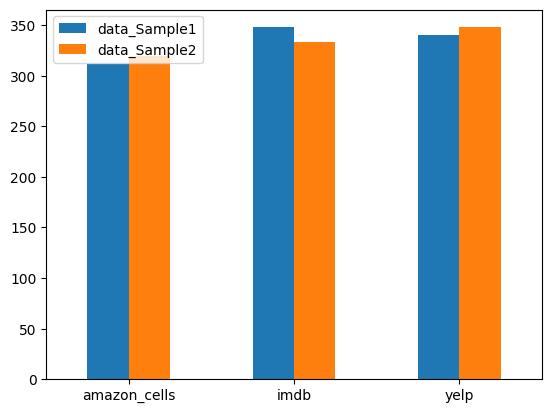

In [91]:
"""Answer of Ex.8"""
index = website
compare = pd.DataFrame({'data_Sample1': data1_cnt,'data_Sample2': data2_cnt},index = index)

ax = compare.plot.bar(rot = 0)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise8!!!!!!!!!!!!!!!!!!!!!!!!!!!!!                                                     Done.
            Cell just above this doc is the ans of Exercise8.

<AxesSubplot: title={'center': 'Web distribution'}>

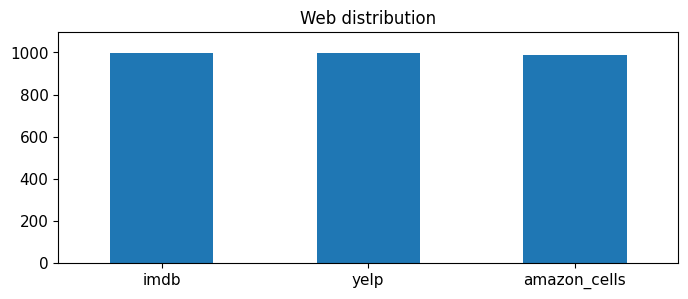

In [92]:
# plot barchart for X
data.Web.value_counts().plot(kind = 'bar',
                                    title = 'Web distribution',
                                    ylim = [0, max(data.Web.value_counts()) * 1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

# 可以看我們plt能畫出哪幾種圖
# print(plt.style.available)

切著示範如何將text當中的字切成一個一個unit

In [93]:
"""檢查一下Comment裡面到底長怎麼樣"""
print(type(data[0:1]['Comment']))
print("---" * 3)
print((data[0:1]['Comment']).shape)
data[0:1]['Comment'][0]

<class 'pandas.core.series.Series'>
---------
(1,)


'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [98]:
"""檢查特定的字詞出現的次數"""
"為X新增一個colume,把text中的每一個unit切出來"
# print("Shape before adding a col")
# print(X[:1].shape)
data['unigrams'] = data['Comment'].apply(lambda x: tokenize_text(x))
# print("Shape after addinng a col")
# print(X[:1].shape)


"""統計各unit出現的次數"""
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.Comment) #learn the vocabulary and return document-term matrix
print(data_counts.shape)
# output should be(2257,35788data
# 表示總共有2257筆資料
# 而在這2257筆資料當中，總共有35788個token

"""把前5筆資料當中的前100個token 拉出來做成array"""
data_counts[0:5, 0:100].toarray()
"""可以透過這個來取出特定index的token"""
count_vect.get_feature_names_out()[0:10]


(2983, 5155)


array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise10!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        Another 1 exist in the fifth record, try to find the word.
                    Do it as efficient as possible

In [99]:
"""Answer of Exercise 10"""
index_of_unit = (data_counts[4:5].toarray() == 1)
result = (count_vect.get_feature_names_out()[index_of_unit[0]])[1:2]

"""用來確認我們上面的程式對不對"""
count_vect.get_feature_names_out()[37:38]

array(['35'], dtype=object)

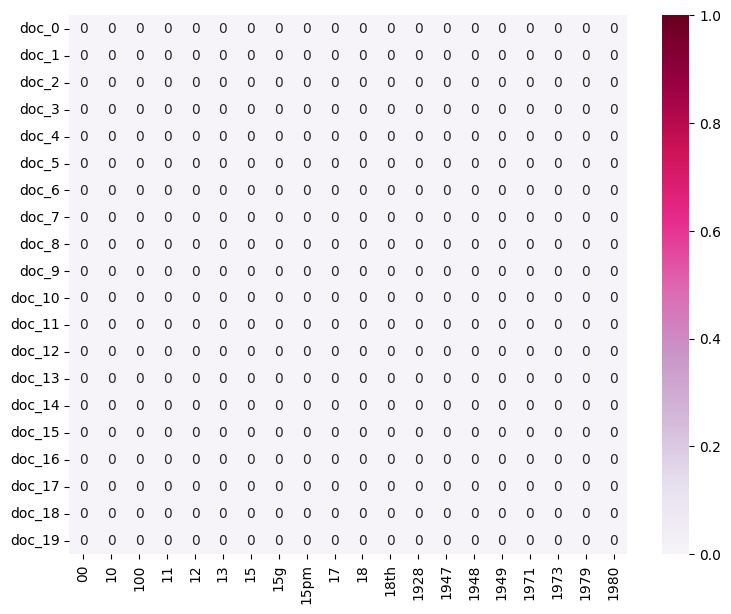

In [100]:
"""將統計數據用圖表畫出來"""
# first twenty features only
plot_x = [str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]

# 前20個資料的前20個token
plot_z = data_counts[0:20, 0:20].toarray()

"""畫出heatmap"""
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise11!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                         我們可以發現整個矩陣非常的稀疏
                    試著找出方法讓我們可以得到更能夠解讀的資料

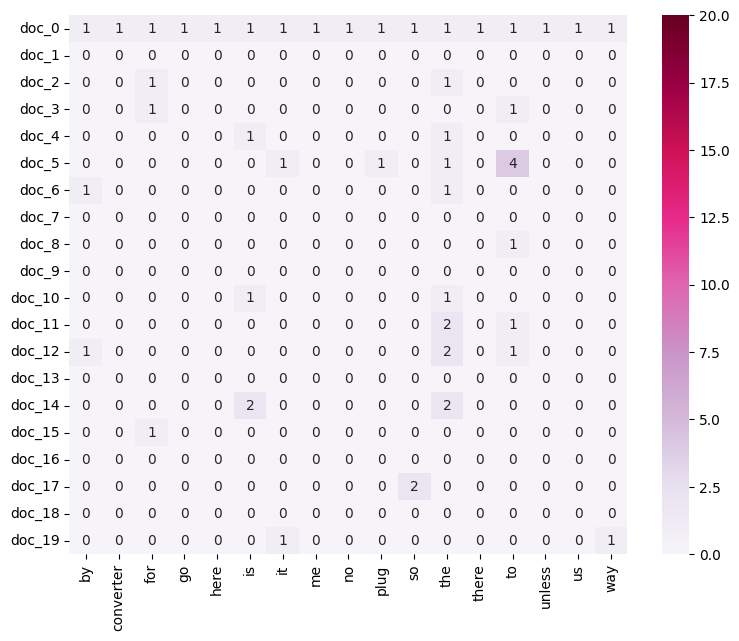

In [102]:
"""Answer of Ex11"""
max_unigram_id = 10000
max_doc = 0
max_amount = 0
for doc in range(0,20):
    index_of_unit = (data_counts[doc:doc + 1,:max_unigram_id].toarray() == 1)
    amount = sum(index_of_unit[0])
    if amount > max_amount:
        max_amount = amount
        max_doc = doc
max_amount = 20

index_of_target_unigram = (data_counts[max_doc:max_doc + 1].toarray() == 1)
target_unigram = count_vect.get_feature_names_out()[index_of_target_unigram[0]][:max_amount]

plot_x = [str(i) for i in target_unigram[:max_amount]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
plot_z = (data_counts[0:20, index_of_target_unigram[0]].toarray())


import seaborn as sns

df_todraw = pd.DataFrame(plot_z[:,:max_amount], columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=max_amount, annot=True)

#Exercise 11說明
首先我先決定了要看幾組data，依照前面的範例，我選擇了20組
接著我算出每一組data含有多少種不同的unigram，希望找出含有最多的unigram的data
找到這一組data之後，選擇一定數量的unigram當作我們圖表的x軸，而這就是由max_amount這變數決定
最後就是針對這20組data，去找出這些unigram出現的數量

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise11!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!                                       Done.
            Cell just above this doc is the ans of Exercise11.

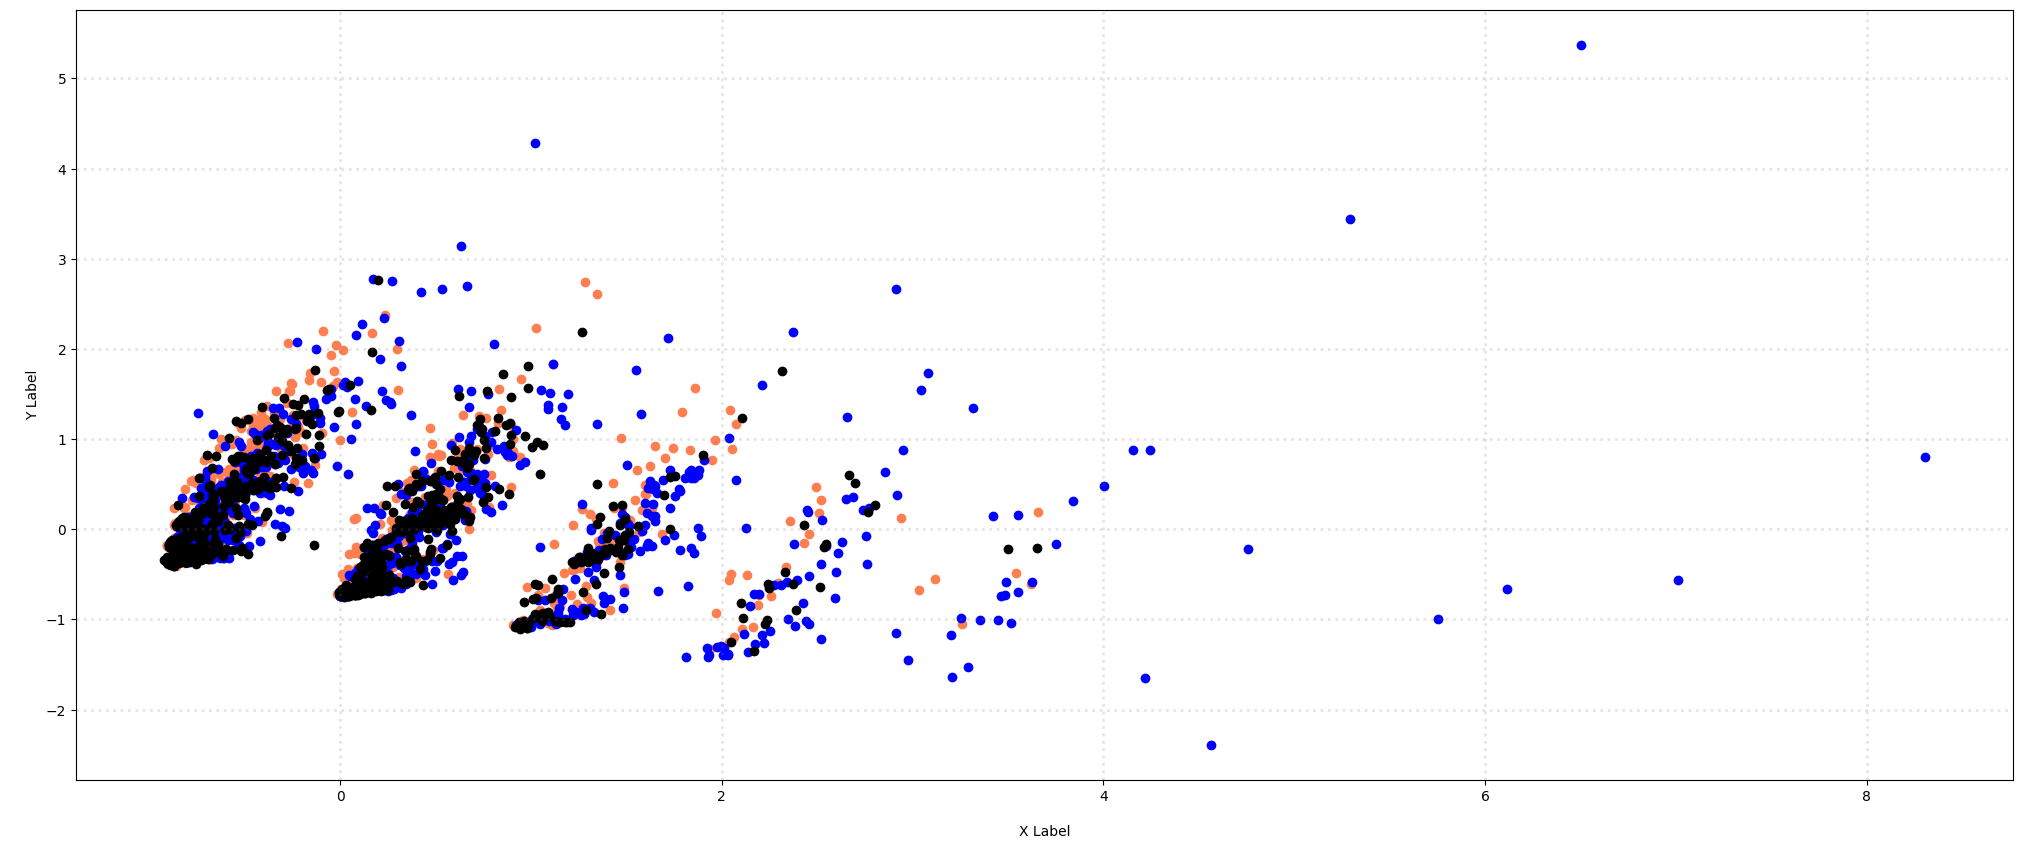

In [104]:
"""PCA主成分分析"""
# 因為我們資料當中的unigram相當的多，所以我們整體維度就高的不可思議，因次需要降維

from sklearn.decomposition import PCA

data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
data_reduced.shape

colors = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for color, Web in zip(colors, website):
    xs = data_reduced[data['Web'] == Web].T[0]
    ys = data_reduced[data['Web'] == Web].T[1]
    ax.scatter(xs, ys, c = color, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise12!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                    將資料化簡為3D的資料，之後使用3-D plot來呈現

Text(0.5, 0, '\nZ Label')

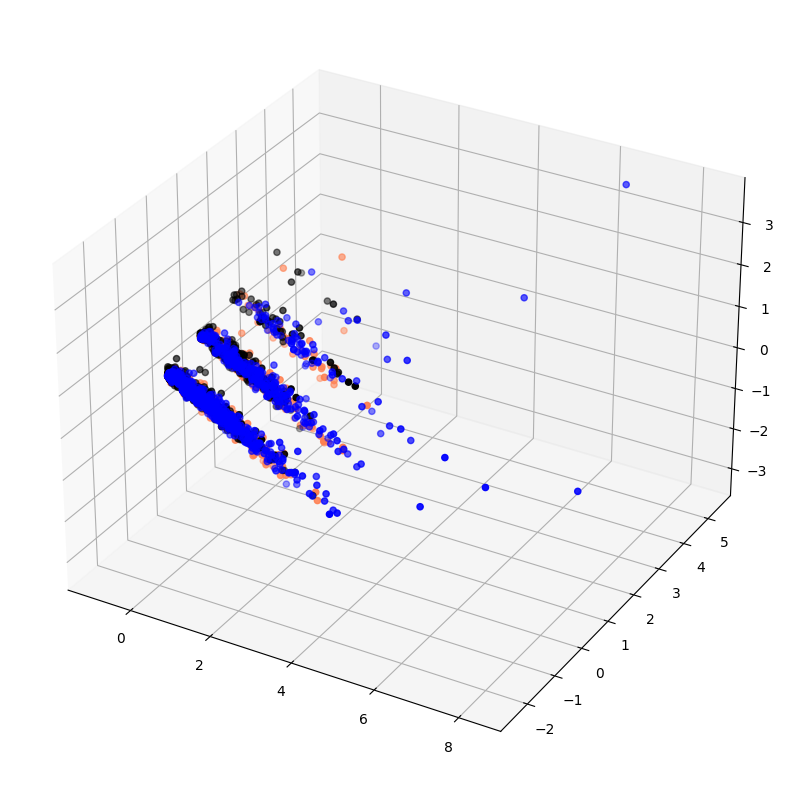

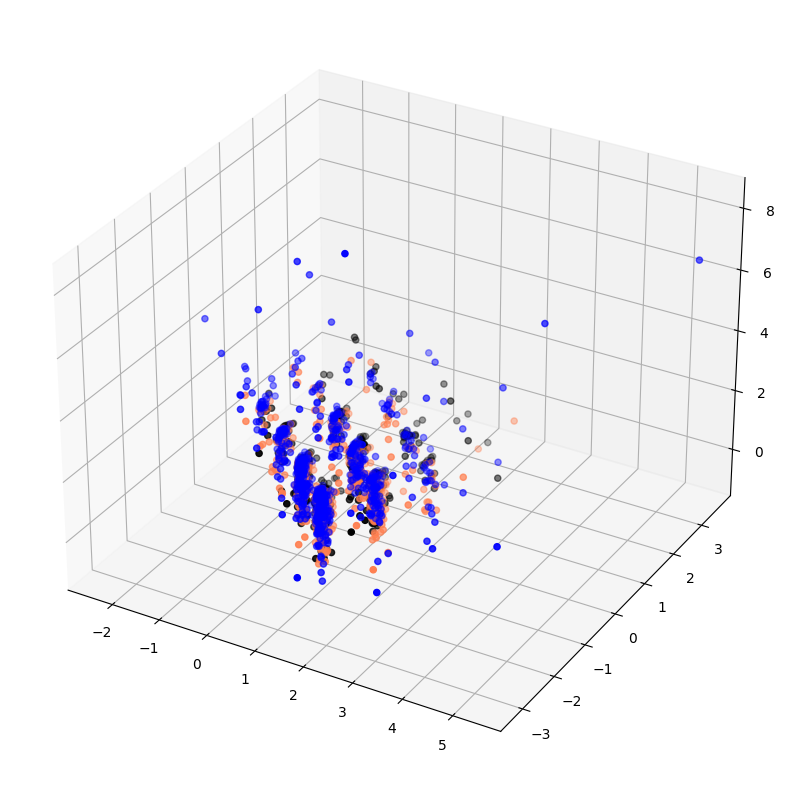

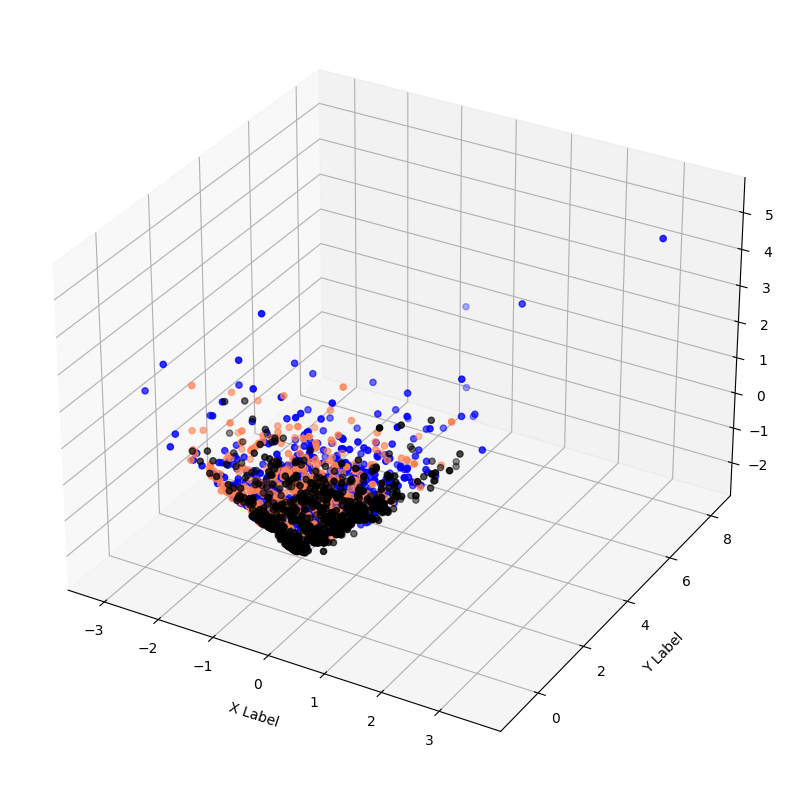

In [106]:
"""Answer of Ex12"""
data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())
data_reduced.shape

colors = ['coral', 'blue', 'black', 'orange']

# plot
for i in range(0,3):
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(projection='3d')

    for color, Web in zip(colors, website):
        xs = data_reduced[data['Web'] == Web].T[i % 3]
        ys = data_reduced[data['Web'] == Web].T[(i + 1) % 3]
        zs = data_reduced[data['Web'] == Web].T[(i + 2) % 3]
        ax.scatter(xs, ys, zs, c = color, marker='o')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise12!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!                                       Done.
            Cell just above this doc is the ans of Exercise12.

In [108]:
term_frequencie = []
for j in range(0,data_counts.shape[1]):
    term_frequencie.append(sum(data_counts[:,j].toarray()))

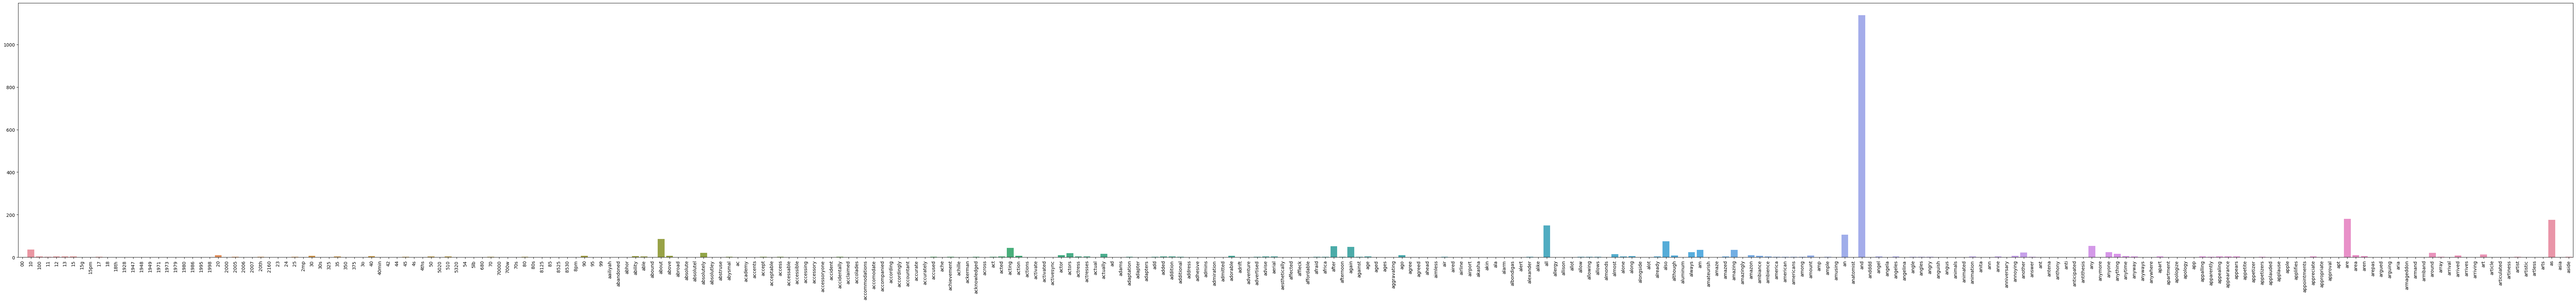

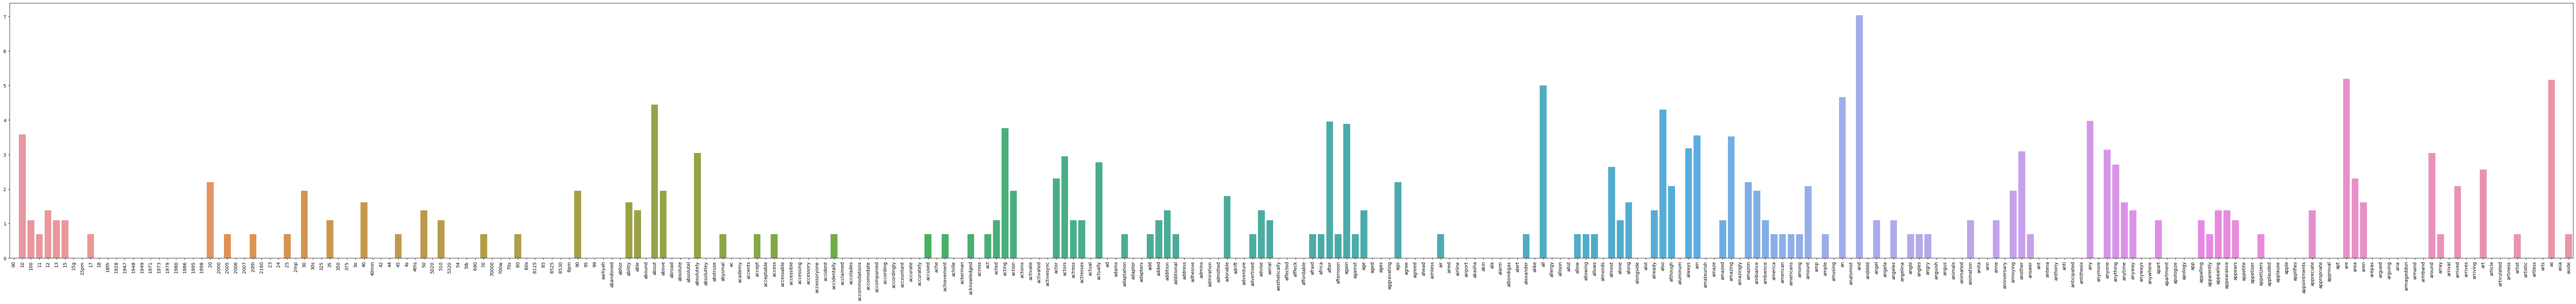

In [134]:
"""統計對於所有document(2257筆) 單一token的出現頻率"""
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

# 代表第一個token出現的頻率
term_frequencies[0] 
"""使用圖表來表示所有字詞出現的頻率"""
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
"""因為字詞頻率出現的差異太大,可以用log來表示,比較好看一點"""
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise13!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                    Use plotly for a better visualization

In [135]:
"""Answer of Ex13"""
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)


fig = px.bar(   
                term_frequencies_log, 
                x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300]
            )

fig.show()



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise13!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!                                                  Done.
            Cell just above this doc is the ans of Exercise13.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise14!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                    Reduce the computational intensity

In [136]:
"Answer of Ex14"
total_frequency = sum(term_frequencies.tolist())
mean_frequency = total_frequency / len(term_frequencies)
mean_frequency

target_id = []
target_freq = []
for index,freq in enumerate(term_frequencies):
    if freq > mean_frequency:
        target_id.append(index)
        target_freq.append(freq)

from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd


# print((count_vect.get_feature_names_out()[target_id]).shape)
# print(target_fr)
app = Dash(__name__)


fig = px.bar(   
                target_freq,
                x=count_vect.get_feature_names_out()[target_id],
                y=target_freq
            )

fig.show()


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise14!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                  Done.
            Cell just above this doc is the ans of Exercise14.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise15!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                    visualize the data, sort by frequncy

In [133]:
"""Answer of Ex15"""
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)


fig = px.bar(   
                target_freq,
                x=count_vect.get_feature_names_out()[target_id],
                y=target_freq
            )
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise15!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!                                                  Done.
              Cell just above this doc is the ans of Exercise15.